# Better Collective Challenge - Data Preparation

Eloy Chang

----------------------------------

## Imports

In [1]:
import pandas as pd
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

## Exploratory data analysis

In [2]:
data = pd.read_excel('../data/sample_data__technical_assessment.xlsx', sheet_name = 'Sheet1')
print(data.shape)
data.head()

(52500, 12)


,activity_month,account_id,brand_id,reg_date,ftd_date,qp_date,ben_login_id,tracker_id,player_reg_product,total_deposit,total_handle,total_ngr
0,2023-11-01,185196607,PA,2023-11-21,2023-11-21,NaT,BCUSA22L,7102592,BETTING,10.0,210.0,13.18
1,2023-11-01,154497623,AZ,2022-10-28,2022-10-28,2022-10-28,actionnetwork,7039239,BETTING,0.0,5.0,4.00
2,2023-11-01,153249011,MI,2022-08-18,2023-12-21,NaT,starsportsmx,7049874,CASINO,0.0,0.0,0.00
3,2023-11-01,184718245,OH,2023-11-13,2023-11-13,2023-11-13,actionnetwork,7106987,BETTING,10.0,210.0,138.98
4,2023-11-01,183573211,OH,2023-11-06,2023-11-06,2023-11-06,BCUSA22NP,7106983,BETTING,10.0,210.0,-320.22


In [3]:
data.rename(columns = {'brand_id' : 'state'}, inplace = True)
data.nunique()

activity_month           21
account_id            45915
state                    29
reg_date                840
ftd_date                870
qp_date                 673
ben_login_id              7
tracker_id              960
player_reg_product        5
total_deposit          2651
total_handle          14110
total_ngr             18548
dtype: int64

In [4]:
data.account_id.value_counts()

154819309    7
154429380    6
168047312    6
156016408    5
154121795    5
            ..
155801711    1
159293469    1
155042036    1
158704017    1
187389455    1
Name: account_id, Length: 45915, dtype: int64

In [5]:
(data.account_id.value_counts() == 1).sum()

40447

40447 accounts out of 45915 (88.09%) only have data on 1 month (they subscribe and churn the same month).

In [6]:
data[['total_deposit', 'total_handle', 'total_ngr']].describe()

,total_deposit,total_handle,total_ngr
count,52500.000000,5.233800e+04,52500.000000
mean,262.379566,1.552656e+03,36.718138
std,3057.920409,2.737943e+04,1037.177318
min,0.000000,0.000000e+00,-116450.000000
25%,0.000000,0.000000e+00,-0.080000
50%,0.000000,3.000000e+01,0.000000
75%,40.000000,2.200000e+02,29.780000
max,437952.000000,4.769780e+06,59168.400000


In [7]:
data.groupby("ben_login_id").agg({
    'account_id' : ['count', 'nunique'],
    'total_deposit' : ['mean', 'std'], 
    'total_handle' : ['mean', 'std'], 
    'total_ngr' : ['mean', 'std']
})

account_id         total_deposit                total_handle  \
                   count nunique          mean           std          mean   
ben_login_id                                                                 
BCCSB22               65      53   4258.719231  20256.414651  10366.069846   
BCUSA22L            2770    2353    485.750787   5113.366412   3061.271154   
BCUSA22N           11988   10357    364.961944   4893.376688   2154.253267   
BCUSA22NP           5062    4421    312.575081   2061.495364   1767.653770   
actionnetwork      18747   16585    144.782889   1047.135312    726.469339   
starsportsmx       13079   11377    245.588063   2127.502012   1730.664860   
wedgetraffic         789     771    340.774208   1738.137797   1712.107123   

                              total_ngr               
                        std        mean          std  
ben_login_id                                          
BCCSB22        33839.830576  234.155385  2858.689158  
BCUSA22L       28097.204200   68.138845  1364.479833  
BCUSA22N       46376.122492   50.656340  1170.876409  
BCUSA22NP      18404.103520   56.123410  1072.321716  
actionnetwork   6179.481643   20.329257   564.575377  
starsportsmx   25927.489477   34.432405  1294.400584  
wedgetraffic    8439.128324    1.164309   901.919137

The brand actionnetwork is the most popular and looks very stable in all metrics but with a modest revenue, meanwhile starsportsmx is the second most popular brand have very high revenue variability. On the other hand, BCCSB22 seems to be a premium brand with lower popularity but with the greater deposits and revenue, but also very hgh volatility.

In [8]:
tracker_data = data.groupby("tracker_id").agg({
    'account_id' : ['count', 'nunique'],
    'total_deposit' : ['mean', 'sum'], 
    'total_handle' : ['mean', 'sum'], 
    'total_ngr' : ['mean', 'sum']
})
tracker_data = tracker_data.sort_values(by = ('account_id', 'count'), ascending = False)
print(tracker_data.head(10))
print(tracker_data.tail(10))

           account_id         total_deposit             total_handle  \
                count nunique          mean         sum         mean   
tracker_id                                                             
7080479          4139    3603    177.553726   734894.87  1208.407465   
7086400          3837    3305    466.192989  1788782.50  3155.305721   
7039239          3317    2774    143.565002   476205.11   824.646293   
7072277          1388    1152    435.380324   604307.89  2371.109146   
7034205          1374    1224     76.316368   104858.69   343.962646   
7077216          1368    1178    178.837617   244649.86   832.932111   
7083318          1193    1040    303.204199   361722.61  1610.639319   
7077214          1117     981    232.747502   259978.96  1272.779596   
7077218           991     881    317.773239   314913.28  2772.217492   
7037834           931     804    400.982052   373314.29  3705.299319   

                         total_ngr             
               

In [9]:
tracker_data['tracker_efectivity'] = tracker_data[('total_ngr', 'sum')] / tracker_data[('account_id', 'count')]
tracker_data.sort_values(by = 'tracker_efectivity',ascending = False)

account_id         total_deposit             total_handle  \
                count nunique          mean       sum           mean   
tracker_id                                                             
7113906             1       1  25700.000000  25700.00  252098.000000   
7080637             1       1   5825.150000   5825.15    7442.850000   
7089126             6       4  10281.666667  61690.00   86565.276667   
7088346             3       3  10000.000000  30000.00   32093.733333   
7087718             2       2    761.000000   1522.00   39078.200000   
...               ...     ...           ...       ...            ...   
7101938             1       1    890.000000    890.00    8296.790000   
7090662            23      18    138.739130   3191.00    2480.607826   
7107670             2       2   1875.000000   3750.00    4500.000000   
7107007            15      14   3788.041333  56820.62   12984.646667   
7103541             2       1   1350.000000   2700.00   16592.500000   

                          total_ngr           tracker_efectivity  
                  sum          mean       sum                     
tracker_id                                                        
7113906     252098.00  13838.800000  13838.80       13838.800000  
7080637       7442.85   5451.600000   5451.60        5451.600000  
7089126     519391.66   4310.668333  25864.01        4310.668333  
7088346      96281.20   3401.856667  10205.57        3401.856667  
7087718      78156.40   3108.905000   6217.81        3108.905000  
...               ...           ...       ...                ...  
7101938       8296.79   -712.440000   -712.44        -712.440000  
7090662      57053.98  -1070.641304 -24624.75       -1070.641304  
7107670       9000.00  -1606.915000  -3213.83       -1606.915000  
7107007     194769.70  -1814.907333 -27223.61       -1814.907333  
7103541      33185.00  -4023.885000  -8047.77       -4023.885000  

[960 rows x 9 columns]

The location 7080479 is the most popular one with almost 8% of the data, however, the location 7086400 with more that 300 leads least (7% least) generate $171k more revenue (41.47% more), on the other side, the location 7077218 is the 9th most popular, but with losses greater that $60k.

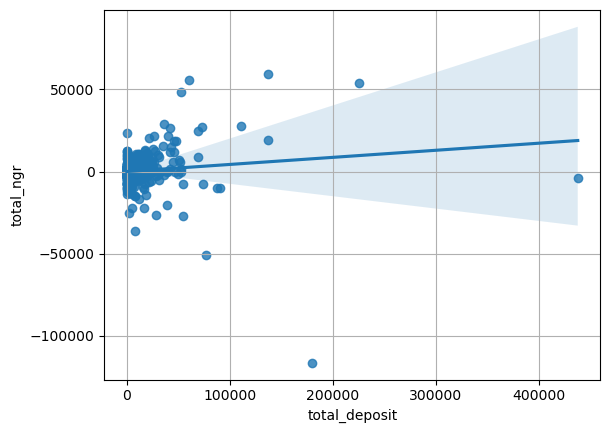

In [10]:
sns.regplot(data, x = "total_deposit", y = "total_ngr")
plt.grid() 

Most of the points are concentrated near the center of the axis, but, in general there is a slight indicator that, account with greater deposits, also generate more revenue. 

## Data Prep

In [11]:
# Retype date columns
date_columns = ['activity_month', 'reg_date', 'ftd_date', 'qp_date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col]).dt.date
    
#check dates makes sense
data[date_columns].agg([lambda x: x.dropna().min(), lambda x: x.dropna().max()])

,activity_month,reg_date,ftd_date,qp_date
<lambda>,2022-09-01,2022-01-04,2020-03-08,2022-01-09
<lambda>,2024-05-01,2024-05-31,2024-06-06,2024-06-09


All dates ranges looks good, now let's make sure that reg_date, ftd_date and qp_date are before that activity_month, and delete all cases that not.

In [12]:
pos = pd.Series([False] * data.shape[0])
for col in date_columns:
    print(col)
    aux = data.apply(lambda x: x.activity_month < x[col], axis = 1)
    print(f'Col {col} has {aux.sum()} wrong cases')   
    pos = (pos) | (aux)
print(f'Total rows to delete: {pos.sum()}')
data = data.loc[~pos]

activity_month
Col activity_month has 0 wrong cases
reg_date
Col reg_date has 18327 wrong cases
ftd_date


C:\Users\eloyc\AppData\Local\Temp\ipykernel_17400\2905772123.py:4: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable.
  aux = data.apply(lambda x: x.activity_month < x[col], axis = 1)


Col ftd_date has 14248 wrong cases
qp_date


C:\Users\eloyc\AppData\Local\Temp\ipykernel_17400\2905772123.py:4: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable.
  aux = data.apply(lambda x: x.activity_month < x[col], axis = 1)


Col qp_date has 8952 wrong cases
Total rows to delete: 20913


## Feature engineering

months_active: is the difference (in months) between activity_month and ftd_date (lifetime of the account).

In [13]:
data.dropna(subset = ['activity_month', 'ftd_date'], inplace = True)
data['months_active'] = data.apply(lambda x: (x.activity_month.month - x.ftd_date.month) + 12 * (x.activity_month.year - x.ftd_date.year), axis = 1)
data['months_active'].describe()

count    29852.000000
mean         7.205849
std          5.356101
min          0.000000
25%          3.000000
50%          6.000000
75%         11.000000
max         40.000000
Name: months_active, dtype: float64

Note: Same variables for reg_date and qp_date can be added.

In [14]:
def calculate_lifetime_variable(data : pd.DataFrame, column : str) -> pd.Series:
    account = ''
    lifetime_variable = 0
    lifetime_serie = []
    for idx, row in data.iterrows(): 
        if account != row.account_id:
            account = row.account_id
            lifetime_variable = row[column]
            lifetime_serie.append(0)
            continue
        lifetime_serie.append(lifetime_variable)
        lifetime_variable += row[column]
    return pd.Series(lifetime_serie, index = data.index)

lifetime_deposit: Sum of all deposits made by the account until the activity_month.

In [15]:
data.sort_values(by = ['account_id', 'activity_month'], ascending = True, inplace = True)
data['lifetime_deposit'] = calculate_lifetime_variable(data, 'total_deposit')
data['lifetime_deposit'].describe()

count     29852.000000
mean         97.954411
std        1472.872821
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      126550.000000
Name: lifetime_deposit, dtype: float64

lifetime_revenue: Sum of all revenue generated by the account until the activity_month.

In [16]:
data['lifetime_revenue'] = calculate_lifetime_variable(data, 'total_ngr')
data['lifetime_revenue'].describe()

count    29852.000000
mean        17.529818
std        626.649784
min     -50267.600000
25%          0.000000
50%          0.000000
75%          0.000000
max      33004.910000
Name: lifetime_revenue, dtype: float64

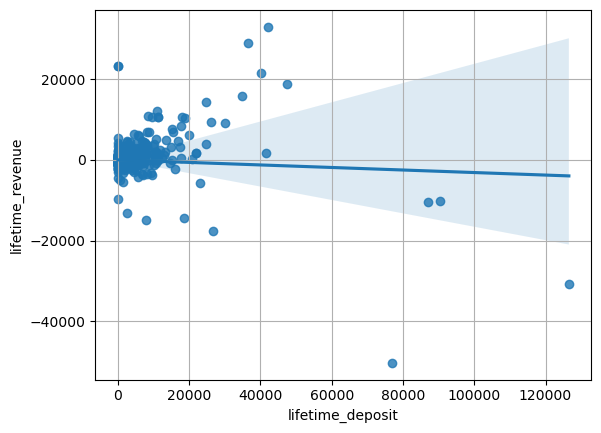

In [17]:
sns.regplot(data, x = "lifetime_deposit", y = "lifetime_revenue")
plt.grid() 

Taking into account lifetime revenue and deposits, the chart look similar to the one looking at only monthly revenue and deposits, this is expected because most of the account have data for only one month.

brand_revenue_lag: total revenue generated by the brand in the previous month of the activity_month.

In [18]:
data['brand_revenue_lag'] = 0
for month in list(data.activity_month.unique()):
    month_pos = data.activity_month == month
    previous_month = month - relativedelta(months = 1)
    previous_month_pos = data.activity_month == previous_month

    if previous_month_pos.sum() == 0:
        continue
    
    for brand in list(data.ben_login_id.loc[month_pos].unique()):
        month_brand_pos = (month_pos) & (data.ben_login_id == brand)
        previous_month_brand_pos = (previous_month_pos) & (data.ben_login_id == brand)
        if previous_month_brand_pos.sum() > 0:
            data.brand_revenue_lag.loc[month_brand_pos] = data.total_ngr.loc[previous_month_brand_pos].mean()

data.brand_revenue_lag.describe()

C:\Users\eloyc\AppData\Local\Temp\ipykernel_17400\3436187165.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.brand_revenue_lag.loc[month_brand_pos] = data.total_ngr.loc[previous_month_brand_pos].mean()


count    29852.000000
mean        52.252510
std        117.791096
min      -2467.540000
25%         23.533810
50%         44.893029
75%         85.791986
max       9489.345000
Name: brand_revenue_lag, dtype: float64

Note: similar variables can be added for total_deposit and total_handle, as well as different lags and trends, longer lags can be useful to track variables seasonality.

tracker_efectivity: Rate between the revenue generated by the leads on a specific location, against the total number of leads from that location.

In [19]:
data['tracker_efectivity'] = 0
for month in list(data.activity_month.unique()):
    month_pos = data.activity_month == month
    previous_months_pos = data.activity_month < month

    if previous_month_pos.sum() == 0:
        continue

    for tracker in list(data.tracker_id.loc[month_pos].unique()):
        month_tracker_pos = (month_pos) & (data.tracker_id == tracker)
        previous_month_tracker_pos = (previous_month_pos) & (data.tracker_id == tracker)
        if previous_month_tracker_pos.sum() > 0:
            data.tracker_efectivity.loc[month_tracker_pos] = data.total_ngr.loc[previous_month_tracker_pos].sum() / data.account_id.loc[previous_month_tracker_pos].count()

data.tracker_efectivity.describe()

C:\Users\eloyc\AppData\Local\Temp\ipykernel_17400\1319195263.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.tracker_efectivity.loc[month_tracker_pos] = data.total_ngr.loc[previous_month_tracker_pos].sum() / data.account_id.loc[previous_month_tracker_pos].count()


count    29852.000000
mean        -8.500300
std        646.492692
min      -7693.210000
25%        -53.164400
50%          4.715455
75%         35.354464
max      14706.600000
Name: tracker_efectivity, dtype: float64

churn: True if this is the last month of data of that account, False otherwise (target variable). 

In [20]:
accounts_last_month = data.groupby('account_id').activity_month.max().reset_index()
accounts_last_month['churn'] = 1
data = data.merge(accounts_last_month, on = ['account_id', 'activity_month'], how = 'left')
data.churn.fillna(0, inplace = True)

## Train - test split

In order to avoid data leaks, while keeping the characteristics of the data, the split will be made following the next steps:

1. Drop last month of data (churn variable for that month will be 1 for all accounts).

2. Split all accounts with only 1 activity month with 80% to train, 20% to test. 

3. For accounts with more that 1 activity_month, for 80% of the accounts use all data to train, for the remaining 20% keep all data but the last date to train, and use the last date to test.  

In [21]:
# 1. Drop last month of data (churn variable for that month will be 1 for all accounts).

data = data.loc[data.activity_month < data.activity_month.max()]

# 2. Split all accounts with only 1 activity month with 80% to train, 20% to test.
accounts_with_one_month = data.account_id.value_counts()
accounts_with_one_month = accounts_with_one_month.loc[accounts_with_one_month == 1].index
data_accounts_with_one_month = data.loc[data.account_id.isin(accounts_with_one_month)]

x_columns = ['months_active', 'lifetime_deposit', 'lifetime_revenue', 'brand_revenue_lag', 'tracker_efectivity']
y_column = ['churn']

X_train, X_test, y_train, y_test = train_test_split(data_accounts_with_one_month[x_columns], data_accounts_with_one_month[y_column], test_size = 0.2, random_state = 42)

# 3. For accounts with more that 1 activity_month, for 80% of the accounts use all data to train
accounts_with_more_data = data.account_id.value_counts()
accounts_with_more_data = accounts_with_more_data.loc[accounts_with_more_data > 1].index
train_accounts = pd.Series(accounts_with_one_month).sample(int(0.8 * len(accounts_with_one_month)))

X_train = pd.concat([X_train, data.loc[data.account_id.isin(train_accounts), x_columns]])
y_train = pd.concat([y_train, data.loc[data.account_id.isin(train_accounts), y_column]])

# for the remaining 20% keep all data but the last date to train, and use the last date to test. 
data_accounts_with_more_data = data.loc[(data.account_id.isin(accounts_with_more_data)) & (~data.account_id.isin(train_accounts))]
data_accounts_with_more_data['last_account_month'] = data_accounts_with_more_data.groupby('account_id').activity_month.transform('max')

X_train = pd.concat([X_train, data_accounts_with_more_data.loc[data_accounts_with_more_data['last_account_month'] != data_accounts_with_more_data['activity_month'], x_columns]])
y_train = pd.concat([y_train, data_accounts_with_more_data.loc[data_accounts_with_more_data['last_account_month'] != data_accounts_with_more_data['activity_month'], y_column]])

X_test = pd.concat([X_test, data_accounts_with_more_data.loc[data_accounts_with_more_data['last_account_month'] == data_accounts_with_more_data['activity_month'], x_columns]])
y_test = pd.concat([y_test, data_accounts_with_more_data.loc[data_accounts_with_more_data['last_account_month'] == data_accounts_with_more_data['activity_month'], y_column]])

# Save data files
with open('../data/train_data.pkl', 'wb') as file:
    pickle.dump([X_train, y_train], file)

with open('../data/test_data.pkl', 'wb') as file:
    pickle.dump([X_test, y_test], file)

C:\Users\eloyc\AppData\Local\Temp\ipykernel_17400\2882147260.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_accounts_with_more_data['last_account_month'] = data_accounts_with_more_data.groupby('account_id').activity_month.transform('max')
